# cvxpy - part a

In [2]:
!pip install cvxpy --q

In [14]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(-8*x1 - 16*x2 + cp.square(x1) + 4*cp.square(x2))

# Define the constraints
constraints = [x1 + x2 <= 5,
               x1 <= 3,
               x1 >= 0,
               x2 >= 0]

# Define the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.OSQP)


# Output the results
x1_value = x1.value
x2_value = x2.value
optimal_value = problem.value

x1_value, x2_value, optimal_value


(array(3.), array(2.), -31.0)

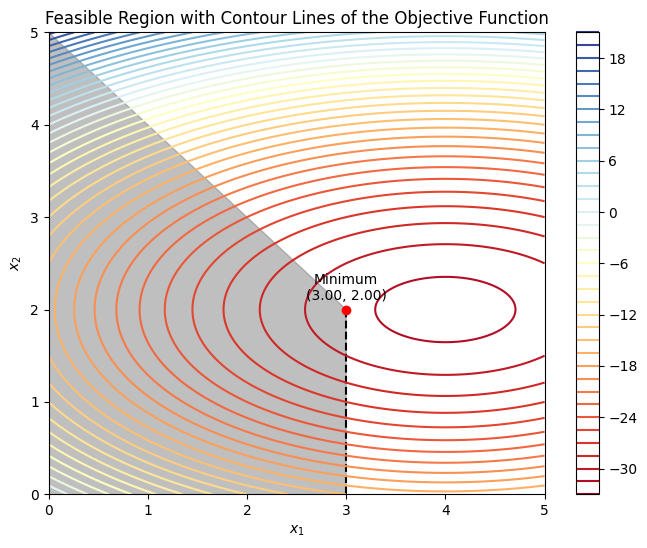

(2.9999999999999782, 2.000000000000011, -30.99999999999995)

In [13]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(-8*x1 - 16*x2 + cp.square(x1) + 4*cp.square(x2))

# Define the constraints
constraints = [x1 + x2 <= 5,
               x1 <= 3,
               x1 >= 0,
               x2 >= 0]

# Define the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.OSQP)

# Output the results
x1_value = x1.value
x2_value = x2.value
optimal_value = problem.value

# Plotting the feasible region
x = np.linspace(0, 5, 400)
y = np.linspace(0, 5, 400)
X, Y = np.meshgrid(x, y)
Z = -8*X - 16*Y + X**2 + 4*Y**2

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Constraints
plt.fill_between(x, 0, np.minimum(5 - x, 3), color='grey', alpha=0.3)

# Mark the optimal point
plt.plot(x1_value, x2_value, 'ro')
plt.annotate(f'Minimum ({x1_value:.2f}, {x2_value:.2f})',
             xy=(x1_value, x2_value), xytext=(x1_value+1, x2_value+1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region with Contour Lines of the Objective Function')
plt.show()


Optimal values:
x1: 3.0
x2: 2.0000000000000004
Optimal value: -31.0


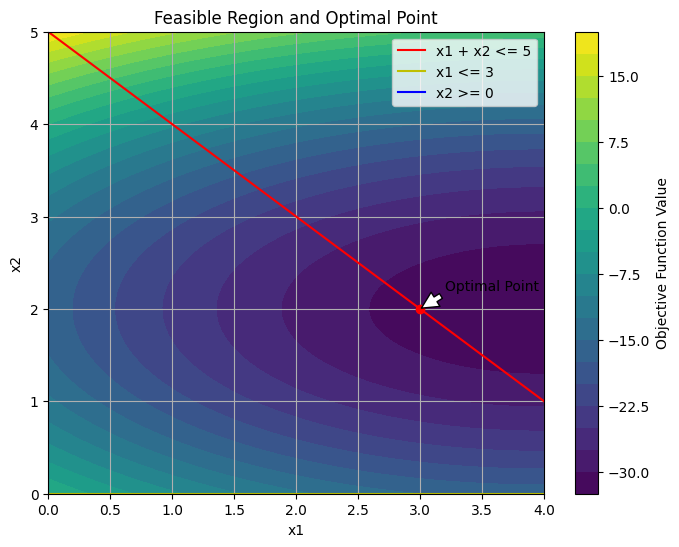

In [15]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(-8*x1 - 16*x2 + cp.square(x1) + 4*cp.square(x2))

# Define the constraints
constraints = [x1 + x2 <= 5,
               x1 <= 3,
               x1 >= 0,
               x2 >= 0]

# Create the problem instance
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(solver=cp.OSQP)

# Optimal values
optimal_x1 = x1.value
optimal_x2 = x2.value
optimal_value = problem.value

print("Optimal values:")
print("x1:", optimal_x1)
print("x2:", optimal_x2)
print("Optimal value:", optimal_value)

# Plotting the feasible region
x1_values = np.linspace(0, 4, 100)
x2_values = np.linspace(0, 5, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
F = -8*X1 - 16*X2 + np.square(X1) + 4*np.square(X2)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, F, levels=20, cmap='viridis')
plt.colorbar(label='Objective Function Value')
plt.xlabel('x1')
plt.ylabel('x2')

# Plotting the constraints
plt.plot(x1_values, 5 - x1_values, label='x1 + x2 <= 5', color='r')
plt.plot([0, 4], [0, 0], label='x1 <= 3', color='y')
plt.plot([0, 0], [0, 5], label='x2 >= 0', color='b')
plt.legend()

# Plotting the optimal point
plt.plot(optimal_x1, optimal_x2, 'ro')
plt.annotate('Optimal Point', xy=(optimal_x1, optimal_x2), xytext=(optimal_x1 + 0.2, optimal_x2 + 0.2),
             arrowprops=dict(facecolor='white', shrink=0.05))

plt.title('Feasible Region and Optimal Point')
plt.grid(True)
plt.show()


# cvxpy - part b

In [31]:
import cvxpy as cp
import numpy as np

# Given data
A1 = np.array([[1, 0, 1], [0, 3, 7], [1, 7, 5]])
A2 = np.array([[0, 2, 8], [2, 6, 0], [8, 0, 4]])
C = np.array([[1, 2, 3], [2, 9, 0], [3, 0, 7]])
b = np.array([11, 19])

# Define the variable
# The variable X is a symmetric matrix, hence it is a semidefinite variable.
X = cp.Variable((3, 3), symmetric=True)

# The objective is to minimize the trace of C^T * X
objective = cp.Minimize(cp.trace(C.T @ X))

# Constraints
# The constraints are that A1 • X == b1 and A2 • X == b2 and X is a semidefinite matrix (X >= 0).
constraints = [cp.trace(A1 @ X) == b[0],
               cp.trace(A2 @ X) == b[1],
               X >> 0]

# Formulate and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the solution
X_value = X.value

# Print the optimal objective value
print("Minimum value of the objective function:", problem.value)

X_value


Minimum value of the objective function: 13.902182526039935


array([[1.05600838, 0.36917833, 0.86830385],
       [0.36917833, 0.12907089, 0.30358367],
       [0.86830385, 0.30358367, 0.71399996]])

# CVXPY - part c

In [22]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(100*x1 + 120*x2)

# Define the constraints
constraints = [x1 + x2 <= 20,
               30*x1 + 20*x2 <= 480,
               x1 + 2*x2 <= 36,
               x1 >= 0,
               x2 >= 0]

# Define the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.OSQP)


# Output the results
x1_value = x1.value
x2_value = x2.value
optimal_value = problem.value

x1_value, x2_value, optimal_value



(array(1.03940377e-31), array(2.73910032e-31), 4.3263241600658383e-29)

Optimal values:
x1: 1.0394037706863976e-31
x2: 2.7391003244828676e-31
Optimal value: 4.3263241600658383e-29


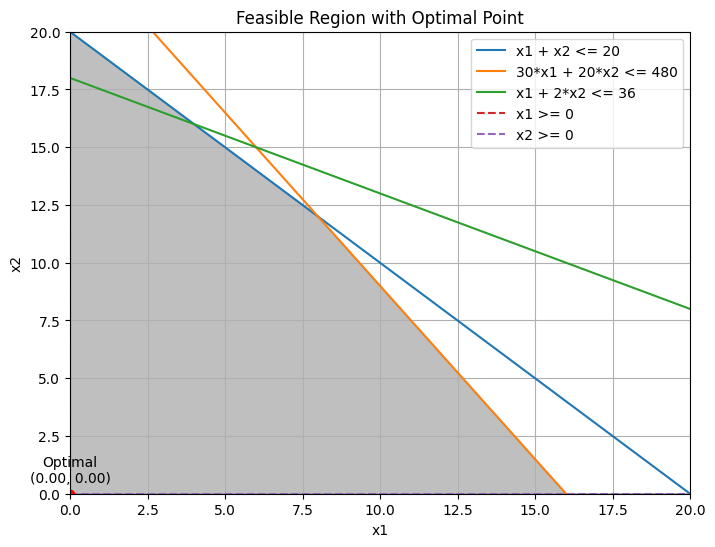

In [29]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(100*x1 + 120*x2)

# Define the constraints
constraints = [x1 + x2 <= 20,
               30*x1 + 20*x2 <= 480,
               x1 + 2*x2 <= 36,
               x1 >= 0,
               x2 >= 0]

# Define the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.OSQP)

# Output the results
x1_value = x1.value
x2_value = x2.value
optimal_value = problem.value

print("Optimal values:")
print("x1:", x1_value)
print("x2:", x2_value)
print("Optimal value:", optimal_value)

# Plot the feasible region
plt.figure(figsize=(8, 6))

# Define the boundary equations of the constraints
x = np.linspace(0, 20, 400)
# Constraint 1: x1 + x2 <= 20
plt.plot(x, 20 - x, label='x1 + x2 <= 20')
# Constraint 2: 30*x1 + 20*x2 <= 480
plt.plot(x, (480 - 30*x) / 20, label='30*x1 + 20*x2 <= 480')
# Constraint 3: x1 + 2*x2 <= 36
plt.plot(x, (36 - x) / 2, label='x1 + 2*x2 <= 36')

# Non-negativity constraints
plt.plot(np.zeros_like(x), x, label='x1 >= 0', linestyle='--')
plt.plot(x, np.zeros_like(x), label='x2 >= 0', linestyle='--')

# Highlight the feasible region
plt.fill_between(x, 0, np.minimum(20 - x, (480 - 30*x) / 20, (36 - x) / 2), color='gray', alpha=0.5)

# Plot the optimal point
plt.plot(x1_value, x2_value, 'ro')
plt.text(x1_value, x2_value + 0.5, f'Optimal\n({x1_value:.2f}, {x2_value:.2f})', ha='center')

plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region with Optimal Point')
plt.legend()
plt.grid(True)
plt.show()
